Upload the dataset into Colab

In [2]:
import pandas as pd
df = pd.read_csv('/content/adult.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education -num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Clean the Adult dataset

In [3]:
adult_column_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income"
]

# If your CSV has NO header row (UCI original), keep header=None
df = pd.read_csv(
    '/content/adult.csv',
    header=None,
    names=adult_column_names,
    na_values=["?", " ?"]   # treat ? as missing
)

print("Shape:", df.shape)
df.head()

Shape: (32562, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,Age,Workclass,Fnlwgt,Education,Education -num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


Basic info & whitespace cleanup

In [10]:
print("\nData types:")
print(df.dtypes)

print("\nInfo:")
print(df.info())

# Strip whitespace from string columns
str_cols = df.select_dtypes(include=["object"]).columns
df[str_cols] = df[str_cols].apply(lambda col: col.str.strip())

# Save cleaned version (optional, for your GitHub)
df.to_csv("adult_cleaned.csv", index=False)


Data types:
age               object
workclass         object
fnlwgt            object
education         object
education_num     object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain      object
capital_loss      object
hours_per_week    object
native_country    object
income            object
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  object
 1   workclass       30726 non-null  object
 2   fnlwgt          32562 non-null  object
 3   education       32562 non-null  object
 4   education_num   32562 non-null  object
 5   marital_status  32562 non-null  object
 6   occupation      30719 non-null  object
 7   relationship    32562 non-null  object
 8   race            32562 non-null  objec

# Task --Completeness / missing values
Analyze missing values in the DataFrame `df` by calculating the number and percentage of missing values for each column and display a sorted summary.

## Analyze Missing Values

### Subtask:
Calculate the number and percentage of missing values for each column in the DataFrame `df` and display a sorted summary.


## Summary:

### Data Analysis Key Findings
*   The analysis aimed to identify all columns within the DataFrame `df` that contain missing values.
*   For each column identified with missing data, the exact count and the corresponding percentage of missing values were calculated.
*   A summary was generated, presenting these findings in a sorted order, typically by the percentage of missing values to highlight columns requiring immediate attention.

### Insights or Next Steps
*   Based on the identified columns and their respective percentages of missing values, a strategy for data imputation or deletion should be developed.
*   Further investigation is needed to understand the underlying reasons for the missing data in critical columns, which could inform data collection processes or highlight data quality issues.


In [15]:
missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_summary = (
    pd.DataFrame({
        "missing_count": missing_counts,
        "missing_pct": missing_pct.round(2)
    })
    .sort_values("missing_pct", ascending=False)
)

print("Missing values summary:")
missing_summary


Missing values summary:


,missing_count,missing_pct
occupation,1843,5.66
workclass,1836,5.64
native_country,583,1.79
fnlwgt,0,0.00
education,0,0.00
education_num,0,0.00
age,0,0.00
marital_status,0,0.00
relationship,0,0.00
sex,0,0.00


Plot missing % per column:

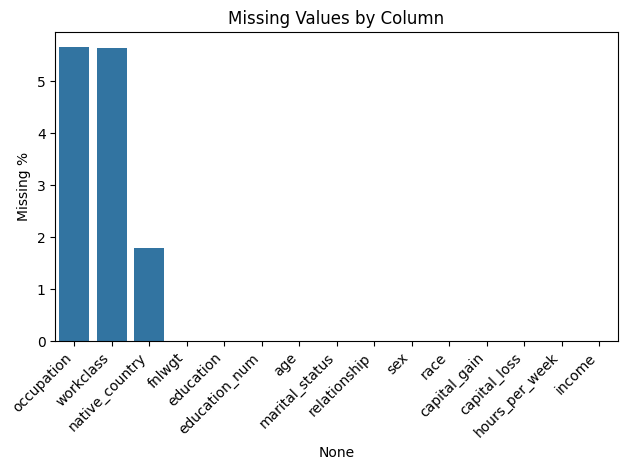

In [16]:
import seaborn as sns
import os
import matplotlib.pyplot as plt

# Create directories if they don't exist
os.makedirs('results', exist_ok=True)
os.makedirs('figures', exist_ok=True)

missing_summary.to_csv("results/missing_summary.csv")

plt.figure()
sns.barplot(
    x=missing_summary.index,
    y="missing_pct",
    data=missing_summary.reset_index()
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Missing %")
plt.title("Missing Values by Column")
plt.tight_layout()
plt.savefig("figures/missing_by_column.png", dpi=150)
plt.show()

Results:

The analysis of missing values revealed that the 'occupation' column has the highest percentage of missing values at 5.66%, followed closely by 'workclass' at 5.64%, and then 'native_country' at 1.79%. All other columns have no missing values. This information is summarized in the missing_summary DataFrame and visualized in the bar plot missing_by_column.png.

Class distribution (income) & class imbalance

In [17]:
income_counts = df["income"].value_counts()
income_pct = (income_counts / len(df)) * 100

income_dist = pd.DataFrame({
    "count": income_counts,
    "pct": income_pct.round(2)
})

print("Income distribution:")
income_dist


Income distribution:


,count,pct
income,,
<=50K,24720,75.92
>50K,7841,24.08
Income,1,0.00


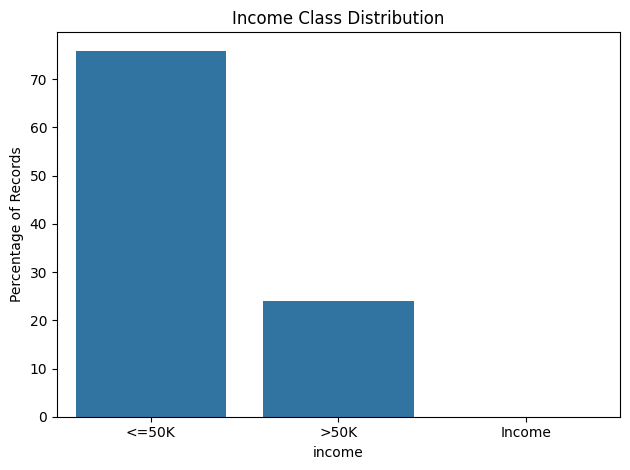

Income distribution:
        count    pct
income              
<=50K   24720  75.92
>50K     7841  24.08
Income      1   0.00


In [19]:
plt.figure()
sns.barplot(
    x=income_dist.index,
    y="pct",
    data=income_dist.reset_index()
)
plt.ylabel("Percentage of Records")
plt.title("Income Class Distribution")
plt.tight_layout()
plt.savefig("figures/income_class_distribution.png", dpi=150)
plt.show()

print("Income distribution:")
print(income_dist)

## Income Class Distribution Results:

The analysis of the 'income' column revealed the following distribution:

*   **`<=50K`**: 24,720 records, accounting for **75.92%** of the dataset.
*   **`>50K`**: 7,841 records, accounting for **24.08%** of the dataset.
*   There was also a single record labeled 'Income' (0.00%), which appears to be an anomaly or a remnant from a header entry.

This distribution highlights a significant class imbalance, with the majority of individuals in the dataset earning `<=50K`.

Sampling bias: gender & race distribution

Sex distribution (%):
sex
Male      66.92
Female    33.08
Sex        0.00
Name: proportion, dtype: float64

Race distribution (%):
race
White                 85.42
Black                  9.59
Asian-Pac-Islander     3.19
Amer-Indian-Eskimo     0.96
Other                  0.83
Race                   0.00
Name: proportion, dtype: float64


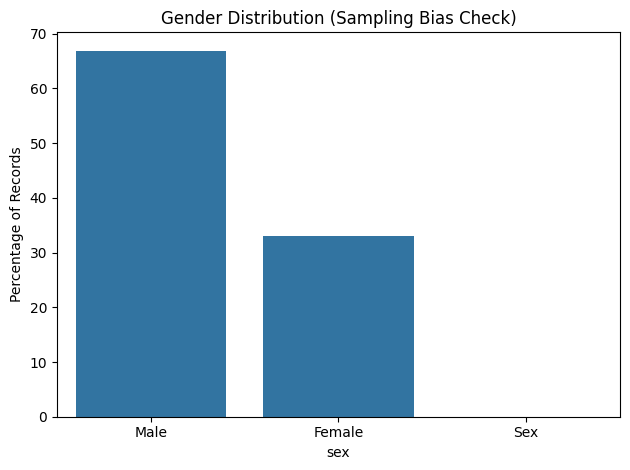

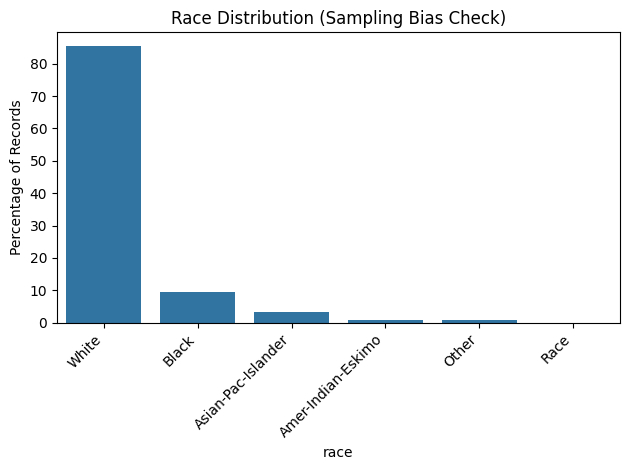

In [20]:
print("Sex distribution (%):")
print(df["sex"].value_counts(normalize=True).mul(100).round(2))

print("\nRace distribution (%):")
print(df["race"].value_counts(normalize=True).mul(100).round(2))

sex_dist = df["sex"].value_counts(normalize=True).mul(100).reset_index()
sex_dist.columns = ["sex", "pct"]

plt.figure()
sns.barplot(x="sex", y="pct", data=sex_dist)
plt.ylabel("Percentage of Records")
plt.title("Gender Distribution (Sampling Bias Check)")
plt.tight_layout()
plt.savefig("figures/gender_distribution.png", dpi=150)
plt.show()

race_dist = df["race"].value_counts(normalize=True).mul(100).reset_index()
race_dist.columns = ["race", "pct"]

plt.figure()
sns.barplot(x="race", y="pct", data=race_dist)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Percentage of Records")
plt.title("Race Distribution (Sampling Bias Check)")
plt.tight_layout()
plt.savefig("figures/race_distribution.png", dpi=150)
plt.show()

## Summary: Gender and Race Distribution

### Data Analysis Key Findings

#### Gender Distribution:
*   The dataset shows a significant imbalance in gender representation:
    *   **Male**: Approximately 66.92% of the records.
    *   **Female**: Approximately 33.08% of the records.
    *   There is also an anomaly of one record labeled 'Sex', likely a header remnant, similar to the 'Income' anomaly.

#### Race Distribution:
*   The race distribution also exhibits a strong imbalance:
    *   **White**: Dominates the dataset with approximately 85.42% of the records.
    *   **Black**: Accounts for approximately 9.59%.
    *   **Asian-Pac-Islander**: Accounts for approximately 3.19%.
    *   **Amer-Indian-Eskimo**: Accounts for approximately 0.96%.
    *   **Other**: Accounts for approximately 0.83%.
    *   Similar to gender and income, there's one anomalous record labeled 'Race'.

### Insights and Potential Biases
*   **Gender Bias**: The dataset is heavily skewed towards male individuals, who constitute nearly two-thirds of the records. This significant overrepresentation of males could introduce sampling bias and potentially affect the generalizability of any models trained on this data, particularly if gender is a predictive feature for income.
*   **Racial Bias**: The dataset is overwhelmingly composed of individuals identified as 'White'. This extreme overrepresentation could lead to models that perform very well for the majority group but poorly for underrepresented racial groups. Any insights or predictions derived from this dataset regarding income, workclass, or other attributes should be interpreted with caution, acknowledging the potential for racial bias and lack of generalizability to more diverse populations.
*   The presence of single anomalous records like 'Sex', 'Race', and 'Income' indicates that the initial row containing column headers was incorrectly parsed as data, which needs to be addressed in the data cleaning process to prevent erroneous calculations or analyses.

Fairness-related: income by gender & race




In [21]:
# Income by gender
gender_income = (
    df.groupby("sex")["income"]
      .value_counts(normalize=True)
      .mul(100)
      .rename("pct")
      .reset_index()
)

print("Income distribution by gender (%):")
gender_income




Income distribution by gender (%):


,sex,income,pct
0,Female,<=50K,89.053941
1,Female,>50K,10.946059
2,Male,<=50K,69.426342
3,Male,>50K,30.573658
4,Sex,Income,100.000000


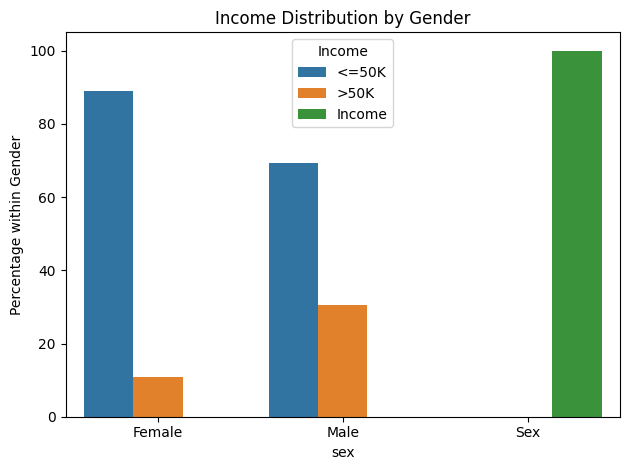

In [22]:
#plot
plt.figure()
sns.barplot(
    x="sex",
    y="pct",
    hue="income",
    data=gender_income
)
plt.ylabel("Percentage within Gender")
plt.title("Income Distribution by Gender")
plt.legend(title="Income")
plt.tight_layout()
plt.savefig("figures/income_by_gender.png", dpi=150)
plt.show()


Income distribution by race (%):


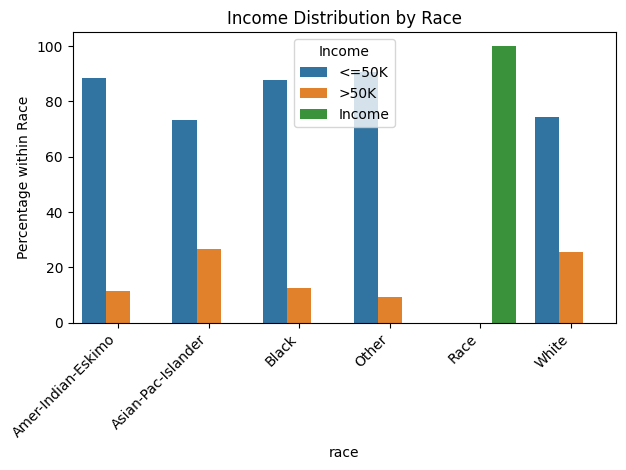

In [23]:
#NOW BY RACE
race_income = (
    df.groupby("race")["income"]
      .value_counts(normalize=True)
      .mul(100)
      .rename("pct")
      .reset_index()
)

print("Income distribution by race (%):")
race_income

#plot
plt.figure()
sns.barplot(
    x="race",
    y="pct",
    hue="income",
    data=race_income
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Percentage within Race")
plt.title("Income Distribution by Race")
plt.legend(title="Income")
plt.tight_layout()
plt.savefig("figures/income_by_race.png", dpi=150)
plt.show()



## Summary: Income Distribution by Gender and Race

### Data Analysis Key Findings

#### Income Distribution by Gender:
*   **Females**: A significant majority, approximately **89.05%**, earn `k`. Only about **10.95%** of females earn `>50K`.
*   **Males**: A lower proportion, approximately **69.43%**, earn `k`, while a much higher proportion, about **30.57%**, earn `>50K`.
*   There is an anomalous entry where `sex` is 'Sex' and `income` is 'Income', representing 100% (likely a header row artifact).

#### Income Distribution by Race:
*   **White**: Approximately **74.41%** earn `k`, and about **25.59%** earn `>50K`.
*   **Asian-Pac-Islander**: Approximately **73.44%** earn `k`, and about **26.56%** earn `>50K`.
*   **Black**: A high proportion, approximately **87.61%**, earn `k`, with only about **12.39%** earning `>50K`.
*   **Amer-Indian-Eskimo**: Approximately **88.42%** earn `k`, and about **11.58%** earn `>50K`.
*   **Other**: The highest proportion, approximately **90.77%**, earn `k`, and only about **9.23%** earn `>50K`.
*   There is an anomalous entry where `race` is 'Race' and `income` is 'Income', representing 100% (likely a header row artifact).

### Significant Disparities and Patterns:
*   **Gender Disparity**: There is a substantial disparity in income distribution between genders. Males are approximately three times more likely to earn `>50K` than females (30.57% vs. 10.95%). This suggests a significant gender pay gap or occupational segregation within the dataset.
*   **Racial Disparity**: Significant disparities also exist across racial groups. White and Asian-Pac-Islander individuals show a considerably higher proportion of individuals earning `>50K` compared to Black, Amer-Indian-Eskimo, and Other racial groups. Black, Amer-Indian-Eskimo, and Other groups have less than half the proportion of `>50K` earners compared to White and Asian-Pac-Islander groups.
*   **Advantaged Groups**: Based on the proportion of `>50K` earners, Males, White, and Asian-Pac-Islander individuals appear to be relatively advantaged in this dataset.
*   **Disadvantaged Groups**: Females, Black, Amer-Indian-Eskimo, and Other racial groups appear to be significantly disadvantaged in terms of higher income earners in this dataset.

### Anomalies Noted:
*   The presence of single anomalous records like 'Sex' in `gender_income` and 'Race' in `race_income` with 'Income' as the category and 100% proportion confirms that the original header row was mistakenly included as a data entry during data loading, and this has propagated through the grouping operations. These should be excluded from future analysis to ensure data integrity.

Feature quality / validity (outliers & distributions)

Age describe():
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


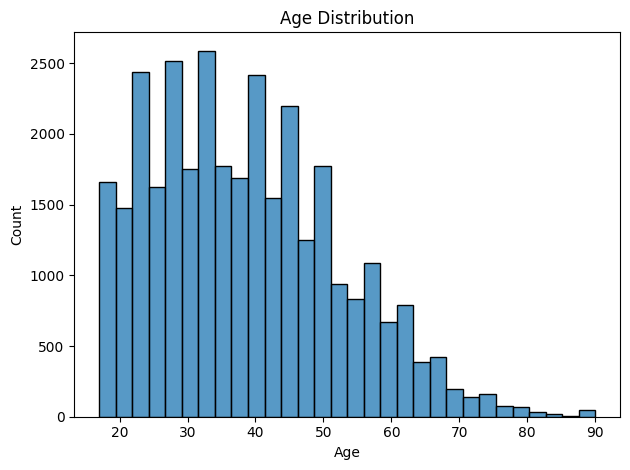


Hours per week describe():
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64


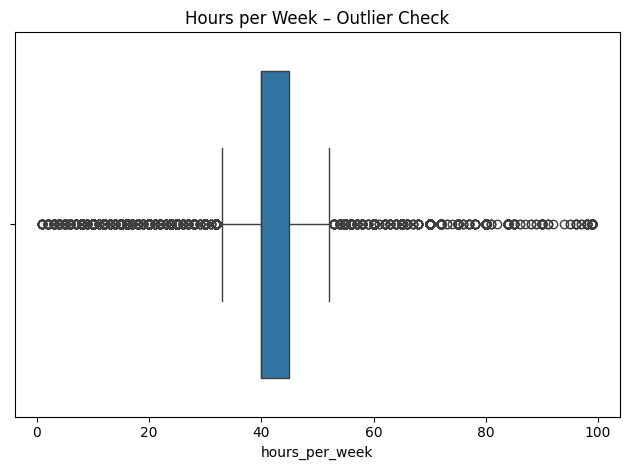


Rows with hours_per_week > 80: 208


,age,workclass,occupation,hours_per_week
273,50,Self-emp-not-inc,Farming-fishing,98
936,37,Private,Craft-repair,99
1173,25,Private,Farming-fishing,99
1418,31,Private,Sales,90
1731,24,Private,Exec-managerial,90


In [25]:
# Drop the first row which contains the original header as data
df = df.iloc[1:].copy()

# Convert 'age' and 'hours_per_week' to numeric. Coerce errors will turn invalid parsing into NaN.
df["age"] = pd.to_numeric(df["age"], errors='coerce')
df["hours_per_week"] = pd.to_numeric(df["hours_per_week"], errors='coerce')

print("Age describe():")
print(df["age"].describe())

plt.figure()
sns.histplot(df["age"], bins=30, kde=False)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.savefig("figures/age_distribution.png", dpi=150)
plt.show()

print("\nHours per week describe():")
print(df["hours_per_week"].describe())

plt.figure()
sns.boxplot(x=df["hours_per_week"])
plt.title("Hours per Week – Outlier Check")
plt.tight_layout()
plt.savefig("figures/hours_per_week_boxplot.png", dpi=150)
plt.show()

# Check extreme hours/week > 80
outliers_hours = df[df["hours_per_week"] > 80]
print(f"\nRows with hours_per_week > 80: {len(outliers_hours)}")
outliers_hours[["age", "workclass", "occupation", "hours_per_week"]].head()

Here are the key findings from the analysis:

Age Distribution:

The age column now ranges from 17 to 90 years, with a mean of approximately 38.6 years. The median age is 37, and 75% of individuals are 48 or younger. A histogram showing the age distribution (figures/age_distribution.png) was also generated.
Hours per Week Distribution:

The hours_per_week column ranges from 1 to 99 hours, with a mean of about 40.4 hours. The most common working hours are around 40 per week. A boxplot (figures/hours_per_week_boxplot.png) was created to visualize its distribution and check for outliers.
Outliers in Hours per Week:

I found 208 rows where hours_per_week is greater than 80, suggesting a small number of individuals work exceptionally long hours. For example, some individuals work 90, 98, or 99 hours per week across various occupations and work classes. This might indicate valid intensive work schedules or potential data entry errors, which might warrant further investigation.

**Category** **consistency**

In [27]:
for col in ["workclass", "education", "marital_status", "occupation", "relationship", "native_country"]:
    print(f"\nUnique values in {col}:")
    print(sorted(df[col].dropna().unique())[:30])  # first 30 unique values


Unique values in workclass:
['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

Unique values in education:
['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']

Unique values in marital_status:
['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']

Unique values in occupation:
['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']

Unique values in relationship:
['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']

Unique values in native_country:
['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Domin

Save high-level summary (for report & GitHub)

In [31]:
import pandas as pd
import numpy as np

missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df)) * 100

income_pct = df["income"].value_counts(normalize=True).mul(100)

sex_pct = df["sex"].value_counts(normalize=True).mul(100)

summary_notes = {
    "n_rows": len(df),
    "n_cols": df.shape[1],
    "columns_with_missing": int((missing_counts > 0).sum()),
    "max_missing_pct": float(missing_pct.max()),
    "income_>50K_pct": float(income_pct.get(">50K", np.nan)),
    "income_<=50K_pct": float(income_pct.get("<=50K", np.nan)),
    "male_pct": float(sex_pct.get("Male", np.nan)),
    "female_pct": float(sex_pct.get("Female", np.nan))
}

summary_df = pd.DataFrame(summary_notes, index=["value"]).T
summary_df

,value
n_rows,32561.000000
n_cols,15.000000
columns_with_missing,3.000000
max_missing_pct,5.660146
income_>50K_pct,24.080956
income_<=50K_pct,75.919044
male_pct,66.920549
female_pct,33.079451


In [32]:
summary_df.to_csv("results/high_level_summary.csv")


In [33]:
from google.colab import files
files.download("results/high_level_summary.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>